## Machine Learning Algorithms for Capstone 1: Baby Products Dataset

_Sentiment Analysis of Amazon Products Reviews_


__Import Packages__

In [1]:
#General packages
import pandas as pd
import numpy as np
import pickle
import scipy.stats
from scipy.stats import norm
import scipy as sp

#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
# Build figures inline
%matplotlib inline

#NLP packages
import re
import nltk
from wordcloud import WordCloud

#Text preprocessing packages
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Import scikit-learn tools, vectorizers, transformer, and classifiers
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

# import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Cross validation packages for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [2]:
#load pickled files to DataFrame
baby_products = pd.read_pickle('baby_products_stats.pkl')
grocery_foods = pd.read_pickle('grocery_foods_stats.pkl')
cell_phones = pd.read_pickle('cell_phones_stats.pkl')

In [3]:
baby_products.head(2)

,reviewText,rating,review_summary
0,Perfect for new parents. We were able to keep ...,5,Awesine
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!


In [4]:
# Labeling the dataset
# label: 1 = high rating (rating = 5), label: 0 = low rating (not5)

def label_func(rating):
    if rating == 5:
        return 1
    else:
        return 0
baby_products['label_baby'] = baby_products['rating'].apply(label_func) # labelling baby_products dataset
baby_products.head(2)

,reviewText,rating,review_summary,label_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,1
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,1


In [170]:
grocery_foods['label_food'] = grocery_foods['rating'].apply(label_func) # labeling  grocery_foods dataset
grocery_foods.head(2)

,reviewText,rating,review_summary,label_food
0,Just another flavor of Kit Kat but the taste i...,4,Good Taste,0
1,I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",0


In [171]:
cell_phones['label_phone'] = cell_phones['rating'].apply(label_func)    # labeling cell_phones dataset
cell_phones.head(2)

,reviewText,rating,review_summary,label_phone
0,They look good and stick good! I just don't li...,4,Looks Good,0
1,These stickers work like the review says they ...,5,Really great product.,1


### Text Pre-Processing to reduce document dimension

- Remove URL.
- Remove numbers and Punctuation
- Convert all characters into lowercase
- Tokenization
- Remove Stopwords
- Lemmatization
- convert list of tokens back into the string

In [5]:
# Remove non-English using NLTK

words = set(nltk.corpus.words.words())

def remove_non_en(text):
    text = " ".join(w.lower() for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text

baby_products['clean_review_baby'] = baby_products['reviewText'].apply(lambda x: remove_non_en(x)) # baby_products dataset
baby_products.head(2)


,reviewText,rating,review_summary,label_baby,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,1,perfect for new . we were able to keep track o...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,1,this book is such a life saver . it been so he...


In [ ]:
grocery_foods['clean_review_food'] = grocery_foods['reviewText'].apply(lambda x: remove_non_en(x)) # grocery_foods dataset
grocery_foods.head(2)

In [ ]:
cell_phones['clean_review_phone'] = cell_phones['reviewText'].apply(lambda x: remove_non_en(x)) # cell_phones dataset

cell_phones(2)

In [6]:
# Preprocessing
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def text_preprocessing(review):
    review = re.sub(r'http\S+', '', review)   # removing URL
    review = re.sub('[^a-zA-Z]', ' ', review) # keep only alpha (removing numbers and punctions)
    review = str(review).lower()              # Lowercase all text
    review = word_tokenize(review)            # Tokenization
    review = [w for w in review if w not in stop_words] # Removing Stopwords
    review = [lemma.lemmatize(word=w, pos='v') for w in review] # Lemmatization
    review = ' '.join(review)
    return review
baby_products['clean_review_baby'] = baby_products['clean_review_baby'].apply(text_preprocessing) # baby_products preprocessiing
baby_products.head(2)

,reviewText,rating,review_summary,label_baby,clean_review_baby
0,Perfect for new parents. We were able to keep ...,5,Awesine,1,perfect new able keep track baby feed sleep di...
1,This book is such a life saver. It has been s...,5,Should be required for all new parents!,1,book life saver helpful able go back track ans...


In [ ]:
grocery_foods['clean_review_food'] = grocery_foods['clean_review_food'].apply(text_preprocessing) # grocery_foods preprocessing
grocery_foods.head(2)


In [ ]:
cell_phones['clean_review_phone'] = cell_phones['clean_review_phone'].apply(text_preprocessing) # cell_phones preprocessing
cell_phones.head(2)

## Machine Learning on Baby_products Dataset

### Create X and y, split train and test data sets

In [7]:
# store the feature matrix (X) and response vector (y) of dataset
# uppercase X because it's an m x n matrix
# lowercase y because it's a m x 1 vector

X_baby = baby_products.clean_review_baby
y_baby = baby_products.label_baby

print(X_baby.shape)
print(y_baby.shape)

(160662,)
(160662,)


In [8]:
# split the data into training and test sets
X_train_baby, X_test_baby, y_train_baby, y_test_baby = train_test_split(X_baby, y_baby, random_state=42, test_size=0.3)

# Show the results of the split
print("X Training set sample size:", (X_train_baby.shape[0]))
print("X Testing set sample size:", (X_test_baby.shape[0]))
print("y Training set sample size:", (y_train_baby.shape[0]))
print("y Testing set sample size:", (y_test_baby.shape[0]))

X Training set sample size: 112463
X Testing set sample size: 48199
y Training set sample size: 112463
y Testing set sample size: 48199


### Vectorize, fit, create document-term matrix with two vectorizers

In [9]:
# Instantiate CountVectorizer and TfidfVectorizer
vect = CountVectorizer(min_df=1, ngram_range=(1, 2)) 
tfidf = TfidfVectorizer(min_df=1, ngram_range=(1, 2))

In [10]:
# Apply CountVectorizer to learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train_baby)

# examine the document-term matrix
X_train_dtm

<112463x1089423 sparse matrix of type '<class 'numpy.int64'>'
	with 7559470 stored elements in Compressed Sparse Row format>

In [11]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test_baby)
X_test_dtm

<48199x1089423 sparse matrix of type '<class 'numpy.int64'>'
	with 2947461 stored elements in Compressed Sparse Row format>

In [12]:
# Apply TfidfVectorizer to learn training data vocabulary,then use it to create a document-term matrix
X_train_tfidf_baby = tfidf.fit_transform(X_train_baby)

# transform testing data with tfidif vectorizer into document-term matrix
X_test_tfidf_baby = tfidf.transform(X_test_baby)
X_test_tfidf_baby

<48199x1089423 sparse matrix of type '<class 'numpy.float64'>'
	with 2947461 stored elements in Compressed Sparse Row format>

### Build baseline model with Naive Bayes and compare vectorizers

In [13]:
# Instantiate MultinomialNB() classifier for CountVectorizer
nb = MultinomialNB(alpha=1, fit_prior=True)

# Train model
nb.fit(X_train_dtm, y_train_baby)

# Make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# Calculate F1 Score
f1 = metrics.f1_score(y_test_baby, y_pred_class)

# Confusion matrix
cm = metrics.confusion_matrix(y_test_baby, y_pred_class)

# Calculate predicted probabilities for X_test_dtm
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]

# Calculate AUC for Naive Bayes model with CountVec
auc = metrics.roc_auc_score(y_test_baby, y_pred_class)

print(vect)
print('\nF1 Score: ', f1)
print('\nConfusion Matrix:\n', cm)
print('\nAUC: ', auc)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

F1 Score:  0.8081951610479386

Confusion Matrix:
 [[12511  7651]
 [ 3836 24201]]

AUC:  0.7418522771839783


From the confusion matrix we can see, using CountVectorizer, at baseline the Naive Bayes model 24201 reviews were correctly predicted as 'five' (positive) ratings (TP) and 12511 were correctly predicted as 'not5' (negative) ratings (TN).
However, 7651 reviews were incorrectly predicted to be 'five' (positive) ratings (FP:Type I error) and 3836 reviews were incorrectly predicted to be 'not5' (negative) ratings (FN: Type II error). 

Let's compare it with the TfidfVectorizer.

In [14]:
# COMPARE TFIDF VECTORIZER

# instantiate MultinomialNB() classifier to use on tfidf vectors
nb_tfidf = MultinomialNB(alpha=1, fit_prior=True)

# train the model 
nb_tfidf.fit(X_train_tfidf_baby, y_train_baby)

# Make class predictions for X_test_tidf_baby
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf_baby)

# Calculate F1 Score
f1 = metrics.f1_score(y_test_baby, y_pred_tfidf)

# Confusion matrix
cm = metrics.confusion_matrix(y_test_baby, y_pred_tfidf)

# Calculate predicted probabilities for Xtest1
y_prob_tfidf = nb_tfidf.predict_proba(X_test_tfidf_baby)[:,1]

# Calculate AUC for Naive Bayes model with Tfidf
auc = metrics.roc_auc_score(y_test_baby, y_prob_tfidf)

print(tfidf)
print('\nF1 Score: ', f1)
print('\nConfusion Matrix:\n', cm)
print('\nAUC: ', auc)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

F1 Score:  0.7753243478017204

Confusion Matrix:
 [[ 4494 15668]
 [  368 27669]]

AUC:  0.8325516131688426


From the confusion matrix we can see, using TFIDF Vectorizer, at baseline the Naive Bayes model 27669 reviews were correctly predicted as 'five' (positive) ratings (TP) and 4494 were correctly predicted as 'not5' (negative) ratings (TN). However, 15668 reviews were incorrectly predicted to be 'five' (positive) ratings (FP) and 368 reviews were incorrectly predicted to be 'not5' (negative) ratings but they are 'five'(FN).

The TfidfVectorizer with default settings did better in predicting high ratings ('five') but did poorly for low ones ('not5'). Parameters definitely need to be tuned.

### Picking Hyperparameters

I want to look at the __alpha__, __min_df__ and __fit_prior__ to see if I can make the model better.

#### min_df:

___Qusetion: Do I have to use X_train dataset or the whole review dataset (X)?___

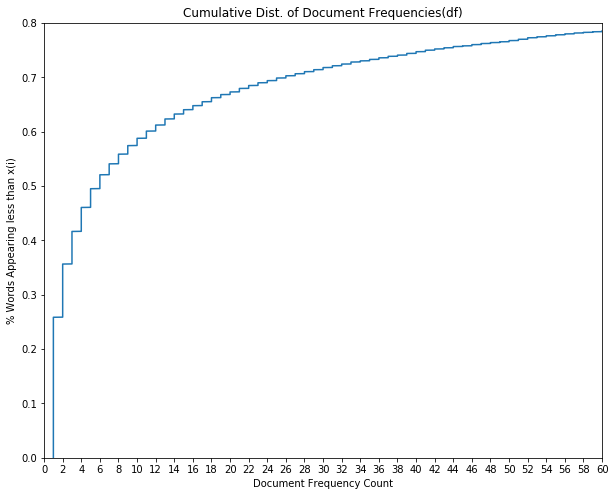

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_baby) # X_baby = baby_products.clean_review_baby
X = X.tocsc() 


#  to get a count of documents in which a word has appeared, sum it across rows
df = np.sum(X>0,axis=0).tolist()[0]

x_df = np.sort(df)
y_df = np.arange(1, len(df) + 1)/len(df)

fig, ax = plt.subplots(figsize=(10,8))
_ = plt.plot(x_df, y_df)
_ = plt.xlim([0,30])
_ = plt.ylim([0, .8])
_ = plt.xticks([x for x in range(0,62,2)])
_ = plt.title('Cumulative Dist. of Document Frequencies(df)')
_ = plt.xlabel('Document Frequency Count')
_ = plt.ylabel('% Words Appearing less than x(i)')

plt.show()

In [16]:
# best min_df for CountVectorizer

values_dict = {}
pos_df = [.0001, .001, .01, .1, 1, 2]

for min_df in pos_df:
    vect = CountVectorizer(min_df=min_df, ngram_range=(1, 2)) 
    X_train_dtm = vect.fit_transform(X_train_baby)
    X_test_dtm = vect.transform(X_test_baby)
    nb = MultinomialNB(alpha=1, fit_prior=True)
    nb.fit(X_train_dtm, y_train_baby)
    y_pred_class = nb.predict(X_test_dtm)
    f1 = metrics.f1_score(y_test_baby, y_pred_class)
    y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
    auc = metrics.roc_auc_score(y_test_baby, y_pred_class)
    values_dict[auc] = [f1, min_df]
    print("AUC: {}, Min_df: {}, F1: {:4f}".format(auc, min_df, f1))
    
best_auc = max(values_dict.keys())
best_f1 = values_dict[max(values_dict.keys())][0]
best_min_df = values_dict[max(values_dict.keys())][1]
print('\n Best Values: \n Min_df: {}, AUC: {}, F1: {:4f}'.format(best_min_df, best_auc, best_f1))

AUC: 0.7570805457143218, Min_df: 0.0001, F1: 0.803446
AUC: 0.7471393649237659, Min_df: 0.001, F1: 0.796200
AUC: 0.7282880816472637, Min_df: 0.01, F1: 0.784735
AUC: 0.6221189835033026, Min_df: 0.1, F1: 0.727414
AUC: 0.7418522771839783, Min_df: 1, F1: 0.808195
AUC: 0.7511579724932828, Min_df: 2, F1: 0.805253
AUC: 0.7536483702327161, Min_df: 3, F1: 0.804435
AUC: 0.75552219163733, Min_df: 4, F1: 0.804516
AUC: 0.7556182808469218, Min_df: 5, F1: 0.803656
AUC: 0.7548656626766711, Min_df: 6, F1: 0.803090

 Best Values: 
 Min_df: 0.0001, AUC: 0.7570805457143218, F1: 0.803446


In [17]:
# best min_df for TfidfVectorizer
values_dict = {}
pos_df = [.0001, .001, .01, .1, 1, 2]

for min_df in pos_df:
    tfidf = TfidfVectorizer(min_df=min_df, ngram_range=(1, 2)) 
    X_train_tfidf_baby = tfidf.fit_transform(X_train_baby)
    X_test_tfidf_baby = tfidf.transform(X_test_baby)
    nb_tfidf = MultinomialNB(alpha=1, fit_prior=True)
    nb_tfidf.fit(X_train_tfidf_baby, y_train_baby)
    y_pred_tfidf = nb_tfidf.predict(X_test_tfidf_baby)
    f1 = metrics.f1_score(y_test_baby, y_pred_tfidf)
    y_prob_tfidf = nb_tfidf.predict_proba(X_test_tfidf_baby)[:,1]
    auc = metrics.roc_auc_score(y_test_baby, y_prob_tfidf)
    values_dict[auc] = [f1, min_df]
    print("AUC: {}, Min_df: {}, F1: {:4f}".format(auc, min_df, f1))

best_auc = max(values_dict.keys())
best_f1 = values_dict[max(values_dict.keys())][0]
best_min_df = values_dict[max(values_dict.keys())][1]
print('\n Best Values: \n Min_df: {}, AUC: {}, F1: {:4f}'.format(best_min_df, best_auc, best_f1))

AUC: 0.8419901678311728, Min_df: 0.0001, F1: 0.812816
AUC: 0.8331396550727564, Min_df: 0.001, F1: 0.806319
AUC: 0.812540886451798, Min_df: 0.01, F1: 0.793671
AUC: 0.6940585984771346, Min_df: 0.1, F1: 0.744600
AUC: 0.8325516131688426, Min_df: 1, F1: 0.775324
AUC: 0.8409721997973282, Min_df: 2, F1: 0.798152

 Best Values: 
 Min_df: 0.0001, AUC: 0.8419901678311728, F1: 0.812816


Best min_df for both CountVectorizer and for TfidfVectorizer is 0.0001.


#### GridSearchCV

__Run GridSearchCV on best parameters for CountVectorizer__

In [18]:
# run this to get a list of the all available pipe-items unique keys for the grid parameters
sorted(nb.get_params().keys())

['alpha', 'class_prior', 'fit_prior']

In [19]:
# Create a list of parameters for tuning
parameters = {'fit_prior': (True, False),
              'alpha': (0.001, 0.01, 0.1, 1, 5, 10),
             }

In [20]:
# Instantiate Vectorizer with new min_df 
vect = CountVectorizer(min_df=.0001, ngram_range=(1, 2)) 

# Apply CountVectorizer to learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.fit_transform(X_train_baby)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test_baby)

# Perform GridSearch on Naive Bayes using the given parameters and CountVectorizer
gs_count = GridSearchCV(MultinomialNB(), parameters, scoring='roc_auc', cv=5)
gs_count.fit(X_train_dtm, y_train_baby)

# View the best score (set to roc_auc) for MultinomialNB with CountVect
print(gs_count)
print('\nBest Score: ', gs_count.best_score_)

# Get best parameters for MultinomialNB with CountVect
print('Best parameters:', gs_count.best_params_)
# Alpha = 1 is the default and picked as best alpha
# fit_prior: True (default)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': (0.001, 0.01, 0.1, 1, 5, 10),
                         'fit_prior': (True, False)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Best Score:  0.8283025959053957
Best parameters: {'alpha': 5, 'fit_prior': False}


__Run GridSearchCV on best parameters for TfidfVectorizer__

In [21]:
# Instantiate Vectorizer with new min_df 
tfidf = TfidfVectorizer(min_df=0.0001, ngram_range=(1, 2))

# Apply TfidfVectorizer to learn training data vocabulary,then use it to create a document-term matrix
X_train_tfidf_baby = tfidf.fit_transform(X_train_baby)

# transform testing data with tfidif vectorizer into document-term matrix
X_test_tfidf_baby = tfidf.transform(X_test_baby)


# Perform GridSearch on Naive Bayes using the given parameters and CountVectorizer
gs_tfidf = GridSearchCV(MultinomialNB(), parameters, scoring='roc_auc', cv=5)
gs_tfidf.fit(X_train_tfidf_baby, y_train_baby)

# View the best score (set to roc_auc) for MultinomialNB with TfidfVect
print(gs_tfidf)
print('\nBest Score: ', gs_tfidf.best_score_)

# Get best parameters for MultinomialNB with TfidfVect
print('Best parameters:', gs_tfidf.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': (0.001, 0.01, 0.1, 1, 5, 10),
                         'fit_prior': (True, False)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Best Score:  0.8418365692475047
Best parameters: {'alpha': 1, 'fit_prior': True}


__Interpretation:__

The Naive Bayes model using a minimum document frequency of .0001 for CountVectorizer and TfidfVectorizer performs well. GridSearchCV indicated that the best parameters for TfidfVectorizer were the default ones but for CountVectorizer it was different ('alpha': 5, 'fit_prior': False). For further algorithms I will continue to use the TfidfVectorizer because it provided slightly better results.For the rest of the algorithms I will use the document terms matrix from the TfidfVectorizer because it has better score.

Next I will look further into the text to further improve the model amongst other algorithms and classifiers. 

In [22]:
# Calculate predicted probabilities for X_test_tfidf_baby
y_prob_nb = gs_tfidf.predict_proba(X_test_tfidf_baby)[:,1]

# Calculate AUC for Naive Bayes model with TfidfVectorizer
auc = metrics.roc_auc_score(y_test_baby, y_prob_nb)

print('AUC: ', auc)

AUC:  0.8419901678311728


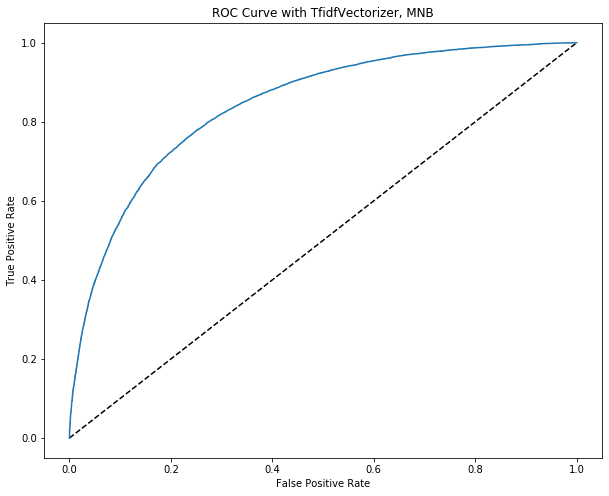

In [23]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_baby, y_prob_nb)

# Plot ROC curve
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with TfidfVectorizer, MNB')
plt.show()

### Most Predictive Features

In [24]:
words = np.array(tfidf.get_feature_names())

# Create an identity matrix the length of the vocabulary
x = np.eye(X_test_tfidf_baby.shape[1]) 

# Use the model to predict on the identity matrix, and get a list of probabilities for each word
probs = gs_tfidf.predict_log_proba(x)[:,0] 

# Sort for most/least probable words for any give class
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Good words\t     P(five (positive) | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(five (positive) | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(five (positive) | word)
          say enough 0.95
  recommend everyone 0.93
         every penny 0.92
    recommend enough 0.91
         worth every 0.91
        great highly 0.91
    highly recommend 0.91
               penny 0.91
       could happier 0.90
   totally recommend 0.90
Bad words	     P(five (positive) | word)
          give three 0.13
              refund 0.12
       poorly design 0.12
        would return 0.12
           execution 0.10
         return item 0.09
           give four 0.09
            one star 0.09
        give instead 0.04
         reason give 0.03


__Word Clouds  for Positive and Nagetive Words__

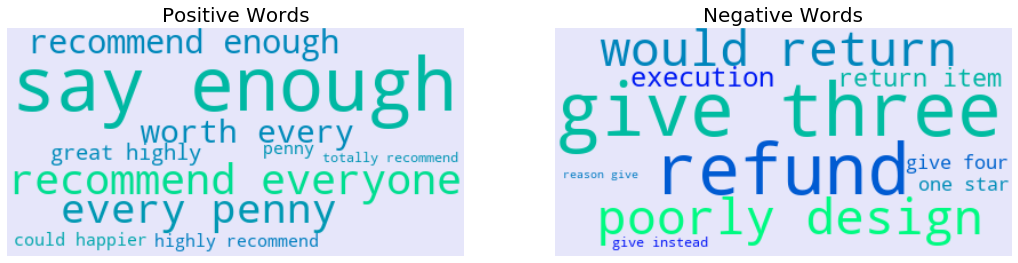

In [67]:
# from PIL import Image

high_rate = dict(zip(good_words, np.round(1-np.exp(good_prob), 2)))
low_rate = dict (zip(bad_words, np.round(1-np.exp(bad_prob), 2)))

# Read the mask image
#baby_bottle_mask = np.array(Image.open("baby_bottle.jpg"))

fig, axs = plt.subplots(1, 2, figsize  = (18,8))

# Generate WordCloud images

wordcloud_high = WordCloud(max_font_size=70, background_color="lavender",colormap='winter').generate_from_frequencies(high_rate)
wordcloud_low = WordCloud(max_font_size=70, background_color="lavender",colormap='winter').generate_from_frequencies(low_rate)

# Display the image

axs[0].imshow(wordcloud_high, interpolation='bilinear')
axs[0].set_title('Positive Words', fontsize=20)
axs[0].axis('off')

axs[1].imshow(wordcloud_low, interpolation='bilinear')
axs[1].set_title('Negative Words', fontsize=20)
axs[1].axis('off');

### Fit other Classifiers with TFIDF Vectorizer

#### 1. Logistic Regression

In [90]:

# Setup the hyperparameter grid
param_grid = {'C': np.arange(0.05, 4, 0.8),
              'l1_ratio': [0, 1]
              }
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs = -1)

# Fit it to the data
logreg_cv.fit(X_train_tfidf_baby, y_train_baby)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


Tuned Logistic Regression Parameters: {'C': 0.8500000000000001, 'l1_ratio': 0}
Best score is 0.8591903785119175


In [91]:

pred_log_clf = logreg_cv.predict(X_test_tfidf_baby)

# Calculate F1 Score
metrics.f1_score(y_test_baby, pred_log_clf)

0.8216119052145806

In [92]:
# Calculate Predicted Probabilities,# keep probabilities for the positive outcome only
pred_prob_log_clf = logreg_cv.predict_proba(X_test_tfidf_baby)[:,1]

# Determine ROC Score
metrics.roc_auc_score(y_test_baby, pred_prob_log_clf)


0.8601935850799451

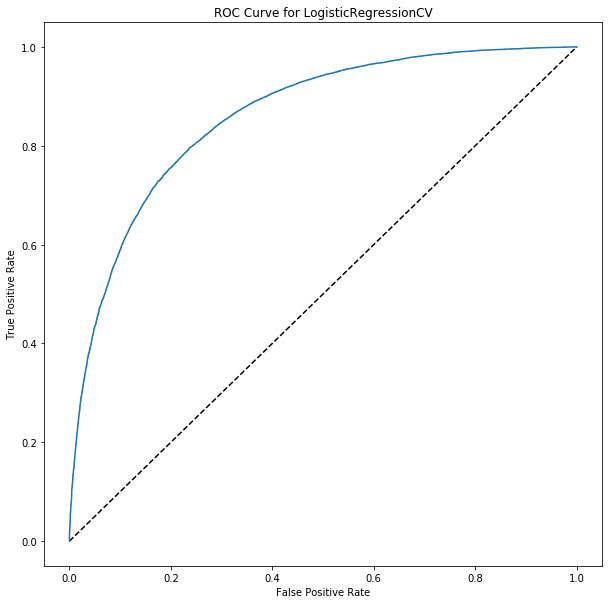

In [93]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_baby, pred_prob_log_clf)

# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegressionCV')
plt.show()


#### 2. Random Forest

In [78]:
# Instantiate and fit Random Forests Model
rf_clf = RandomForestClassifier(class_weight='balanced',n_jobs = -1).fit(X_train_tfidf_baby, y_train_baby)


pred_rf_clf = rf_clf.predict(X_test_tfidf_baby)

# Calculate F1 Score
metrics.f1_score(y_test_baby, pred_rf_clf)


0.7980435195907292

In [81]:
# Create the parameter grid
parameters = {'max_features': ['sqrt', 'auto'],
              'max_depth': [10, 60, 100, None],
              'n_estimators': [50, 100, 300, 500]
              }

# Instantiate the grid search model
gs_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), 
                     parameters, scoring='roc_auc', n_jobs=4, cv=3)

# Fit the grid search to the data
gs_rf.fit(X_train_tfidf_baby, y_train_baby)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [82]:
# Get best parameters and best accuracy score
print('Best Score: ', gs_rf.best_score_)
print('Best Parameters: ', gs_rf.best_params_)

Best Score:  0.8354701064754955
Best Parameters:  {'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 500}


In [83]:
# calculate predicted probabilities # keep probabilities for the positive outcome only
pred_prob_rf_clf = gs_rf.predict_proba(X_test_tfidf_baby)[:, 1]

In [84]:
# Determine ROC score
metrics.roc_auc_score(y_test_baby, pred_prob_rf_clf)

0.8360841137989617

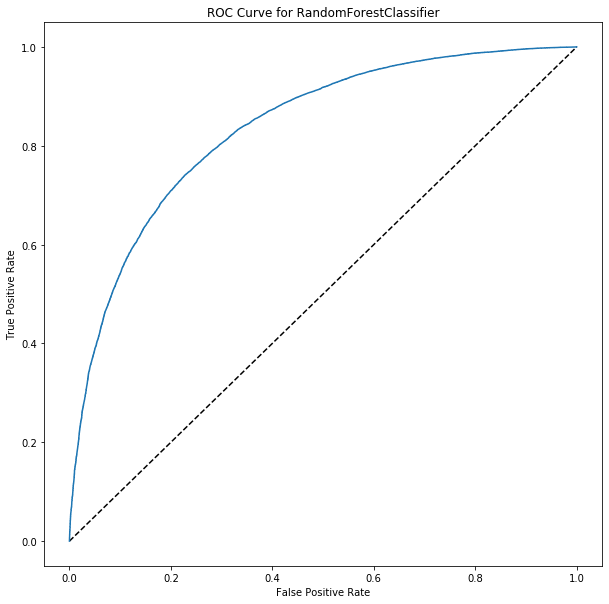

In [85]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_baby, pred_prob_rf_clf)

# Plot ROC curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--', , label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.show()

### Thresholding for best model based on different business situation

- Adjust threshold of best classifier which is Logistic Regression

- The default threshold for interpreting probabilities to class labels is 0.5
      Prediction < 0.5 = Class 0
      Prediction >= 0.5 = Class 1
- Procedure for Thresholding:
      1. Fit Model on the Training Dataset.
      2. Predict Probabilities on the Test Dataset.
      3. For each threshold in Thresholds:
            3a. Convert probabilities to Class Labels using the threshold.
            3b. Evaluate Class Labels.
            3c. If Score is Better than Best Score.
            3ci. Adopt Threshold.
      4. Use Adopted Threshold When Making Class Predictions on New Data.


__Scoring metrics:__ 
    
    - Precision 
    - Recall
    - Accuracy
    - Balanced Accuracy (Accuracy determined for imbalanced datasets)
    - fbeta-score

#### I. __Business Case 1: Market Comparisons of the Baby Products__

I will look at __acccuracy__ and __confusion matrices__ to determined the best threshold to have best accuracy, and least number of false positives and false negatives.


In [169]:
# Create and print the confusion matrix for the LogReg Model
confusion_logreg = metrics.confusion_matrix(y_test_baby, pred_log_clf)
print(confusion_logreg)
print('-'* 17)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))

[[14110  6052]
 [ 4269 23768]]
-----------------
[['TN' 'FP']
 ['FN' 'TP']]


In [130]:
# Calculate balanced accuracy
balanced_accuracy_score(y_test_baby, pred_log_clf)

0.7737841425035732

In [160]:
# define thresholds
thresholds_a =np.arange(0,1,.01)

In [161]:
# apply threshold to positive probabilities to create labels
def to_labels(y_pred_prob, threshold):
    return (y_pred_prob >= threshold).astype('int')

In [162]:
# evaluate each threshold
accuracy_points = [accuracy_score(y_test_baby, to_labels(pred_prob_log_clf, t)) for t in thresholds_a]

# get best threshold
ix = np.argmax(accuracy_points)

print('Best Threshold=%.3f' % (thresholds_a[ix]))
print()
print('Highest Accuracy=%.5f'%(accuracy_points[ix]))
print()
print(metrics.confusion_matrix(y_test_baby, to_labels(pred_prob_log_clf, thresholds_a[ix])))

Best Threshold=0.480

Highest Accuracy=0.78593

[[13701  6461]
 [ 3857 24180]]


In [163]:
balanced_accuracy_points = [balanced_accuracy_score(y_test_baby, to_labels(pred_prob_log_clf, t)) for t in thresholds_a]

# get best threshold
ix1 = np.argmax(balanced_accuracy_points)

print('Best Threshold=%.3f' % (thresholds_a[ix1]))
print()
print('Highest Accuracy=%.5f'%(balanced_accuracy_points[ix1]))
print()
print(metrics.confusion_matrix(y_test_baby, to_labels(pred_prob_log_clf, thresholds_a[ix1])))

Best Threshold=0.580

Highest Accuracy=0.77886

[[15683  4479]
 [ 6172 21865]]


The threshold level of 0.48 provides the best results with an accuracy of 0.786. In total there are 10318 mispredictions, 6172 false negatives and 4479 false positives.


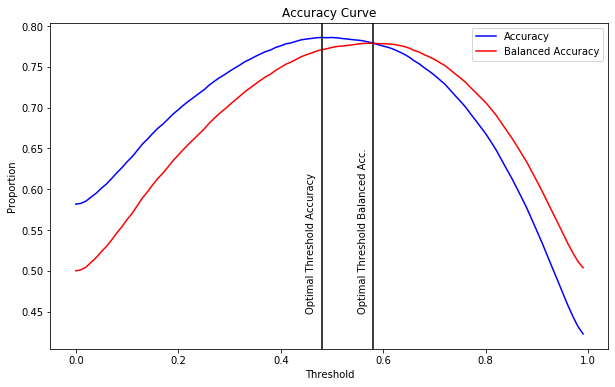

In [156]:
plt.figure(figsize=(10,6))
plt.plot(thresholds, accuracy_points, color='blue')
plt.plot(thresholds, balanced_accuracy_points, color='red')
plt.title('Accuracy Curve')
plt.legend(('Accuracy', 'Balanced Accuracy'))
plt.xlabel('Threshold')
plt.axvline(x=.48, color='black')
plt.text(.45,.45,'Optimal Threshold Accuracy',rotation=90)
plt.axvline(x=.58, color='black')
plt.text(.55,.45,'Optimal Threshold Balanced Acc.',rotation=90)
plt.ylabel('Proportion')
plt.show()

#### II. Business Case 2: Customer Satisfaction
For this case we will target the negative or low rated reviews because negative (low rated) reviews helps sellers to understand the issue and to improve their products and services. To measure this I will use Fbeta-score because it is a better measure when focusing on a specific class in this case low ratings and also the importance of precision and recall can be controlled by the coefficient beta based on different scenarios. For this case we will give more importance to recall and hence will put more attention on minimizing false negatives.

In [158]:
# Calculate Precision and Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test_baby, pred_prob_log_clf)
thresholds = np.append(thresholds, 1)

In [101]:
# Define a function to apply threshold to positive probabilities to create labels
def to_labels(y_pred_prob, threshold):
    return (y_pred_prob >= threshold).astype('int')

In [102]:
# evaluate each threshold
scores = [metrics.fbeta_score(y_test_baby, to_labels(pred_prob_log_clf, t), beta=0.5) for t in thresholds]


In [104]:
# get best threshold
ix = np.argmax(scores)
print('Best Threshold=%.3f, fbeta-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.643, fbeta-Score=0.82469


__Optimal Threshold for high Rating for different beta values__

In [127]:
# fbeta_score for beta = 0.5

    
# evaluate each threshold
scores = [metrics.fbeta_score(y_test_baby, to_labels(pred_prob_log_clf, t), beta=0.5) for t in thresholds]

# get best threshold
ix = np.argmax(scores)
print('beta=', 0.5)
print()
print('Best Threshold=%.3f, fbeta-Score=%.5f' % (thresholds[ix], scores[ix]))
print()
print('Classification_Report:')
print(metrics.classification_report(y_test_baby, to_labels(pred_prob_log_clf, thresholds[ix])))
   

beta= 0.5

Best Threshold=0.643, fbeta-Score=0.82469

Classification_Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75     20162
           1       0.86      0.71      0.78     28037

    accuracy                           0.76     48199
   macro avg       0.77      0.77      0.76     48199
weighted avg       0.78      0.76      0.77     48199



In [128]:
# fbeta_score for beta = 1

    
# evaluate each threshold
scores_1 = [metrics.fbeta_score(y_test_baby, to_labels(pred_prob_log_clf, t), beta=1) for t in thresholds]

# get best threshold
ix = np.argmax(scores_1)
print('beta=', 1)
print()
print('Best Threshold=%.3f' % (thresholds[ix]))
print()
print('fbeta-Score=%.5f' % (scores_1[ix]))
print()
print('Classification Report:')
print(metrics.classification_report(y_test_baby, to_labels(pred_prob_log_clf, thresholds[ix])))

beta= 1

Best Threshold=0.441

fbeta-Score=0.82684

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.64      0.71     20162
           1       0.77      0.89      0.83     28037

    accuracy                           0.78     48199
   macro avg       0.79      0.76      0.77     48199
weighted avg       0.79      0.78      0.78     48199



In [164]:

# fbeta_score for beta = 2

    
# evaluate each threshold
scores_2 = [metrics.fbeta_score(y_test_baby, to_labels(pred_prob_log_clf, t), beta=2) for t in thresholds]

# get best threshold
ix = np.argmax(scores_2)
print('beta=', 2)
print()
print('Best Threshold=%.3f' % (thresholds[ix]))
print()
print('fbeta-Score=%.5f' % (scores_2[ix]))
print()
print('Classification Report:')
print(metrics.classification_report(y_test_baby, to_labels(pred_prob_log_clf, thresholds[ix])))

beta= 2

Best Threshold=0.215

fbeta-Score=0.89603

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.33      0.48     20162
           1       0.67      0.98      0.79     28037

    accuracy                           0.71     48199
   macro avg       0.79      0.65      0.64     48199
weighted avg       0.77      0.71      0.66     48199



#### Optimal Threshold for low rating 

In [168]:
# fbeta_score for beta = 2

    
# evaluate each threshold
scores_2_not5 = [metrics.fbeta_score(y_test_baby, to_labels(pred_prob_log_clf, t), beta=2, pos_label=0) for t in thresholds]

# get best threshold
ix = np.argmax(scores_2_not5)
print('beta=', 2)
print()
print('Best Threshold=%.3f' % (thresholds[ix]))
print()
print('fbeta-Score=%.5f' % (scores_2_not5[ix]))
print()
print('Classification Report:')
print(metrics.classification_report(y_test_baby, to_labels(pred_prob_log_clf, thresholds[ix])))

beta= 2

Best Threshold=0.802

fbeta-Score=0.82871

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.94      0.70     20162
           1       0.92      0.47      0.62     28037

    accuracy                           0.67     48199
   macro avg       0.74      0.71      0.66     48199
weighted avg       0.77      0.67      0.65     48199



The Fbeta-measure with a beta value of 2.0 increases the importance of recall and lowers the importance of precision. 

If maximizing precision minimizes false positives, and maximizing recall minimizes false negatives, then the F2-measure puts more attention on minimizing false negatives than minimizing false positives.

For this business case we will give more importance to recall in other words put more attention on minimizing false negatives.
The optimal threshold for this case is 0.215 with fbeta_score of 0.896.


Now lets plot the Precision, Recall and fbeta-Score on a graph together.

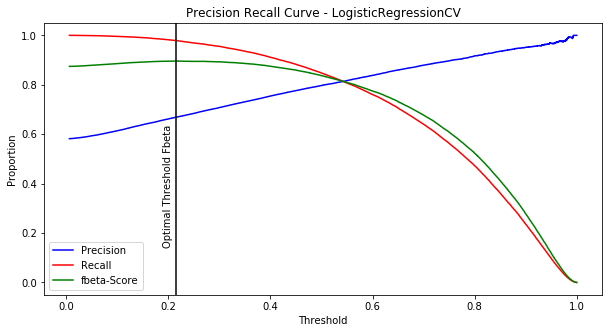

In [167]:
# Plot Precision, Recall and fbeta-Score on a graph together.

plt.figure(figsize=(10,5))
plt.plot(thresholds, precision, color='blue')
plt.plot(thresholds, recall, color='red')
plt.plot(thresholds, scores_2, color='green')
plt.title('Precision Recall Curve - LogisticRegressionCV')
plt.legend(('Precision', 'Recall', 'fbeta-Score'))
plt.xlabel('Threshold')
plt.ylabel('Proportion')
plt.axvline(x=.215, color='black')
plt.text(.19,.15,'Optimal Threshold Fbeta',rotation=90)

plt.show()
